# Project - Predictive Modelling

## Import Libraries

1. General libraries to work with data and visualize data:

In [1]:
import numpy as np
import pandas as pd

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

2. sklearn libraries to perform regression and classifications:

In [2]:
# For randomized data splitting
from sklearn.model_selection import train_test_split

## 1. Logistic Regression
from sklearn.linear_model import LogisticRegression

## 2. Linear Discriminat Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

## 3. CART
from sklearn.tree import DecisionTreeClassifier

3. To check model performance:

In [3]:
from sklearn import metrics

# calculate accuracy measures and confusion matrix

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score

4. To visualize the decision tree:

In [44]:
# To visualize the decision tree

from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

##--conda install pydot
##--conda install -c anaconda graphviz

# 2 Logistic Regression, LDA, CART

Problem 2: Logistic Regression, LDA and CART

You are a statistician at the Republic of Indonesia Ministry of Health and you are provided with a data of 1473 females collected from a Contraceptive Prevalence Survey. The samples are married women who were either not pregnant or do not know if they were at the time of the survey.

The problem is to predict do/don't they use a contraceptive method of choice based on their demographic and socio-economic characteristics.

## 2.1 Data Ingestion:

Read the dataset. Do the descriptive statistics and do null value condition check, check for duplicates and outliers and write an inference on it. Perform Univariate and Bivariate Analysis and Multivariate Analysis.

### Read dataset and explore

In [62]:
cData= pd.read_excel('Contraceptive_method_dataset.xlsx')

In [63]:
cData.shape

(1473, 10)

There are 1473 rows and 10 columns in the dataset

In [6]:
cData.head()

Wife_age Wife_ education Husband_education  No_of_children_born  \
0      24.0         Primary         Secondary                  3.0   
1      45.0      Uneducated         Secondary                 10.0   
2      43.0         Primary         Secondary                  7.0   
3      42.0       Secondary           Primary                  9.0   
4      36.0       Secondary         Secondary                  8.0   

  Wife_religion Wife_Working  Husband_Occupation Standard_of_living_index  \
0   Scientology           No                   2                     High   
1   Scientology           No                   3                Very High   
2   Scientology           No                   3                Very High   
3   Scientology           No                   3                     High   
4   Scientology           No                   3                      Low   

  Media_exposure  Contraceptive_method_used  
0         Exposed                        No  
1         Exposed                        No  
2         Exposed                        No  
3         Exposed                        No  
4         Exposed                        No

In [7]:
cData.tail()

Wife_age Wife_ education Husband_education  No_of_children_born  \
1468      33.0        Tertiary          Tertiary                  NaN   
1469      33.0        Tertiary          Tertiary                  NaN   
1470      39.0       Secondary         Secondary                  NaN   
1471      33.0       Secondary         Secondary                  NaN   
1472      17.0       Secondary         Secondary                  1.0   

     Wife_religion Wife_Working  Husband_Occupation Standard_of_living_index  \
1468   Scientology          Yes                   2                Very High   
1469   Scientology           No                   1                Very High   
1470   Scientology          Yes                   1                Very High   
1471   Scientology          Yes                   2                      Low   
1472   Scientology           No                   2                Very High   

     Media_exposure  Contraceptive_method_used  
1468         Exposed                       Yes  
1469         Exposed                       Yes  
1470         Exposed                       Yes  
1471         Exposed                       Yes  
1472         Exposed                       Yes

In [8]:
cData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1402 non-null   float64
 1   Wife_ education            1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1452 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   int64  
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 115.2+ KB


In [9]:
cData.dtypes

Wife_age                     float64
Wife_ education               object
Husband_education             object
No_of_children_born          float64
Wife_religion                 object
Wife_Working                  object
Husband_Occupation             int64
Standard_of_living_index      object
Media_exposure                object
Contraceptive_method_used     object
dtype: object

Most of the numerical columns are of type float64, int64 already.

'Husband_Occupation' data type is already encoded from categorical variable.

Categorical columns like Education (both 'Wife_ education', 'Husband_education'), 'Wife_religion', 'Wife_Working' , 'Standard_of_living_index', 'Media_exposure', 'Contraceptive_method_used' are object type. These can be encoded.

In [10]:
cData.describe().T

count       mean       std   min   25%   50%   75%   max
Wife_age             1402.0  32.606277  8.274927  16.0  26.0  32.0  39.0  49.0
No_of_children_born  1452.0   3.254132  2.365212   0.0   1.0   3.0   4.0  16.0
Husband_Occupation   1473.0   2.137814  0.864857   1.0   1.0   2.0   3.0   4.0

In [11]:
cData.describe(include='object').T

count unique          top  freq
Wife_ education            1473      4     Tertiary   577
Husband_education          1473      4     Tertiary   899
Wife_religion              1473      2  Scientology  1253
Wife_Working               1473      2           No  1104
Standard_of_living_index   1473      4    Very High   684
Media_exposure             1473      2      Exposed  1364
Contraceptive_method_used  1473      2          Yes   844

### Missing Values

In [12]:
cData.isnull().sum()

Wife_age                     71
Wife_ education               0
Husband_education             0
No_of_children_born          21
Wife_religion                 0
Wife_Working                  0
Husband_Occupation            0
Standard_of_living_index      0
Media_exposure                0
Contraceptive_method_used     0
dtype: int64

In [13]:
cData.apply(lambda x: x.isnull().value_counts())

Wife_age  Wife_ education  Husband_education  No_of_children_born  \
False      1402           1473.0             1473.0                 1452   
True         71              NaN                NaN                   21   

       Wife_religion  Wife_Working  Husband_Occupation  \
False         1473.0        1473.0              1473.0   
True             NaN           NaN                 NaN   

       Standard_of_living_index  Media_exposure   Contraceptive_method_used  
False                    1473.0           1473.0                     1473.0  
True                        NaN              NaN                        NaN

There are 71 missing values in Wife_age column, 21 missing values in No_of_children_born column

#### Treat Null/Missing Values

In [64]:
cData['Wife_age'].fillna(cData['Wife_age'].median(), inplace=True)

In [65]:
cData['No_of_children_born'].value_counts().to_frame()

No_of_children_born
2.0                   274
1.0                   273
3.0                   255
4.0                   192
5.0                   131
0.0                    97
6.0                    90
7.0                    49
8.0                    46
9.0                    16
10.0                   11
11.0                   11
12.0                    4
13.0                    2
16.0                    1

In [66]:
cData['No_of_children_born'].fillna('2', inplace=True)
#Fix 'No_of_children_born' with frequent. Mean, Median are not good options right?

Fix: drop null 'No_of_children_born'?

In [67]:
cData.isnull().sum()

Wife_age                     0
Wife_ education              0
Husband_education            0
No_of_children_born          0
Wife_religion                0
Wife_Working                 0
Husband_Occupation           0
Standard_of_living_index     0
Media_exposure               0
Contraceptive_method_used    0
dtype: int64

In [68]:
#fix
# let's convert 'No_of_children_born' object column from object type to float type
i='No_of_children_born'
cData[i] = cData[i].astype(float)

In [20]:
cData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1473 non-null   float64
 1   Wife_ education            1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1473 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   int64  
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 115.2+ KB


There are no missing values in the dataset now.

### Outliers

In [69]:
cData_out = cData.loc[:, [
    'Wife_age', 'No_of_children_born','Husband_Occupation']]

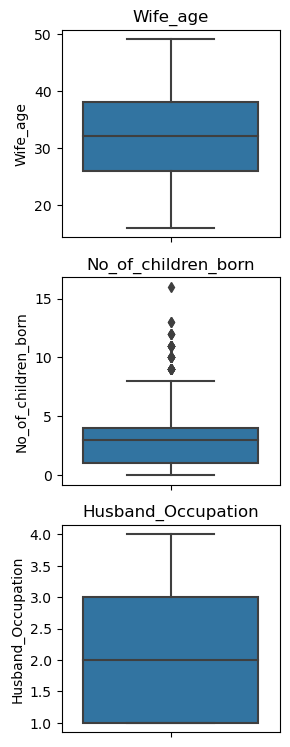

In [22]:
#cData_out = cData.drop(['Contraceptive_method_used'], axis=1)
plt.figure(figsize=(3, 10))

feature_list = cData_out.columns
for i in range(len(feature_list)):
    plt.subplot(4,1, i + 1)
    sns.boxplot(y = cData_out[feature_list[i]], data=cData_out,dodge=True)
    plt.title(feature_list[i])
    plt.tight_layout()

The outliers are in the No_of_children_born category. It would be necessary to treat the outliers in this feature. However, we will proceed without treating them in this model.

Fix

https://wellsr.com/python/how-to-make-seaborn-boxplots-in-python/

### Univariate Analysis

### Bivariate Analysis

In [ ]:
sns.pairplot(cData, hue='Contraceptive_method_used', diag_kind='kde');

### Mutlivariate Analysis

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='No_of_children_born', y= 'Husband_education',hue='Contraceptive_method_used',  order = ['Uneducated',"Primary", "Secondary",'Tertiary'],data=cData)
plt.title('Box Plot of Husband Education vs No of children')
plt.show();

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='No_of_children_born', y= 'Wife_ education',hue='Contraceptive_method_used',  order = ['Uneducated',"Primary", "Secondary",'Tertiary'],data=cData)
plt.title('Box Plot of Wife Education vs No of children')
plt.show();

In [ ]:
sns.boxplot(x='No_of_children_born', y='Wife_age', data=cData)
plt.show();

In [ ]:
sns.boxplot(x='No_of_children_born', y='Wife_age', hue='Contraceptive_method_used', data=cData)
plt.show();

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='No_of_children_born', y= 'Wife_Working',hue='Contraceptive_method_used',data=cData)
plt.title('Box Plot of Working Wife vs No of children')
plt.show();

In [ ]:
k=6
k_child_df = cData[cData['No_of_children_born']> k]
k_child_df.describe(include='all').T

## 2.2 Data Preparation

Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis) and CART.

### 2.2.1 Encode Data

In [70]:
for i in cData.columns:
    if cData[i].dtypes== 'object':
        print(i, ': \n')
        print(cData[i].value_counts())
        print('       ****       ')

Wife_ education : 

Tertiary      577
Secondary     410
Primary       334
Uneducated    152
Name: Wife_ education, dtype: int64
       ****       
Husband_education : 

Tertiary      899
Secondary     352
Primary       178
Uneducated     44
Name: Husband_education, dtype: int64
       ****       
Wife_religion : 

Scientology        1253
Non-Scientology     220
Name: Wife_religion, dtype: int64
       ****       
Wife_Working : 

No     1104
Yes     369
Name: Wife_Working, dtype: int64
       ****       
Standard_of_living_index : 

Very High    684
High         431
Low          229
Very Low     129
Name: Standard_of_living_index, dtype: int64
       ****       
Media_exposure  : 

Exposed        1364
Not-Exposed     109
Name: Media_exposure , dtype: int64
       ****       
Contraceptive_method_used : 

Yes    844
No     629
Name: Contraceptive_method_used, dtype: int64
       ****       


In [71]:
## Convert the target variable to Nominal
## We are coding up the 'Contraceptive_method_used' variable in #Fix Yes 0, No 1
cData['Contraceptive_method_used']=np.where(cData['Contraceptive_method_used'] =='Yes', '0', cData['Contraceptive_method_used'])
cData['Contraceptive_method_used']=np.where(cData['Contraceptive_method_used'] =='No', '1', cData['Contraceptive_method_used'])

In [72]:
## We are encoding the 'Wife_ education' feature 
cData['Wife_ education']=np.where(cData['Wife_ education'] =='Tertiary', '4', cData['Wife_ education'])
cData['Wife_ education']=np.where(cData['Wife_ education'] =='Secondary', '3', cData['Wife_ education'])

cData['Wife_ education']=np.where(cData['Wife_ education'] =='Primary', '2', cData['Wife_ education'])
cData['Wife_ education']=np.where(cData['Wife_ education'] =='Uneducated', '1', cData['Wife_ education'])

In [73]:
## We are encoding the 'Husband_education' feature 
cData['Husband_education']=np.where(cData['Husband_education'] =='Tertiary', '4', cData['Husband_education'])
cData['Husband_education']=np.where(cData['Husband_education'] =='Secondary', '3', cData['Husband_education'])

cData['Husband_education']=np.where(cData['Husband_education'] =='Primary', '2', cData['Husband_education'])
cData['Husband_education']=np.where(cData['Husband_education'] =='Uneducated', '1', cData['Husband_education'])

In [74]:
## We are encoding the 'Standard_of_living_index' feature 
cData['Standard_of_living_index']=np.where(cData['Standard_of_living_index'] =='Very High', '4', cData['Standard_of_living_index'])
cData['Standard_of_living_index']=np.where(cData['Standard_of_living_index'] =='High', '3', cData['Standard_of_living_index'])
cData['Standard_of_living_index']=np.where(cData['Standard_of_living_index'] =='Low', '2', cData['Standard_of_living_index'])
cData['Standard_of_living_index']=np.where(cData['Standard_of_living_index'] =='Very Low', '1', cData['Standard_of_living_index'])

In [75]:
#Fix Media_exposure 'Media_exposure ' name has extra white space in column name.
cData = pd.get_dummies(cData, columns=['Media_exposure ', 'Wife_Working', 'Wife_religion'], drop_first=True)
cData.head()

Wife_age Wife_ education Husband_education  No_of_children_born  \
0      24.0               2                 3                  3.0   
1      45.0               1                 3                 10.0   
2      43.0               2                 3                  7.0   
3      42.0               3                 2                  9.0   
4      36.0               3                 3                  8.0   

   Husband_Occupation Standard_of_living_index Contraceptive_method_used  \
0                   2                        3                         1   
1                   3                        4                         1   
2                   3                        4                         1   
3                   3                        3                         1   
4                   3                        2                         1   

   Media_exposure _Not-Exposed  Wife_Working_Yes  Wife_religion_Scientology  
0                            0                 0                          1  
1                            0                 0                          1  
2                            0                 0                          1  
3                            0                 0                          1  
4                            0                 0                          1

Fix do we need turn all categorical variables via one hot encoding or nominal 1 2 3. If latter, which order?

In [26]:
#fix
# let's convert the object column from object type to float type
for i in cData.columns:
    if cData[i].dtypes== 'object':
        cData[i] = cData[i].astype(float)

In [27]:
cData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Wife_age                            1473 non-null   float64
 1   No_of_children_born                 1473 non-null   float64
 2   Husband_Occupation                  1473 non-null   int64  
 3   Contraceptive_method_used           1473 non-null   float64
 4   Media_exposure _Not-Exposed         1473 non-null   uint8  
 5   Standard_of_living_index_Low        1473 non-null   uint8  
 6   Standard_of_living_index_Very High  1473 non-null   uint8  
 7   Standard_of_living_index_Very Low   1473 non-null   uint8  
 8   Wife_Working_Yes                    1473 non-null   uint8  
 9   Wife_religion_Scientology           1473 non-null   uint8  
 10  Husband_education_Secondary         1473 non-null   uint8  
 11  Husband_education_Tertiary          1473 no

TypeError: Vertical orientation requires numeric `y` variable.

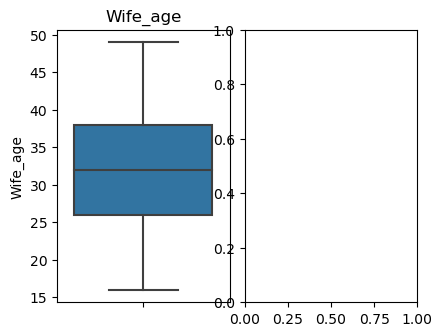

In [84]:
#cData_out = cData.drop(['Contraceptive_method_used'], axis=1)
plt.figure(figsize=(10, 12))

feature_list = cData.columns
for i in range(len(feature_list)):
    plt.subplot(4,5, i + 1)
    sns.boxplot(y = cData[feature_list[i]], data=cData,dodge=True)
    plt.title(feature_list[i])
    plt.tight_layout()

### 2.2.2 Split Data

In [85]:
X= cData.drop('Contraceptive_method_used', axis=1)
y= cData['Contraceptive_method_used']

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size= .3, random_state= 1)

In [86]:
X_train.head()

Wife_age Wife_ education Husband_education  No_of_children_born  \
453       31.0               4                 4                  1.0   
99        27.0               2                 3                  5.0   
1044      31.0               4                 4                  3.0   
807       25.0               2                 3                  4.0   
1400      32.0               3                 4                  4.0   

      Husband_Occupation Standard_of_living_index  \
453                    1                        4   
99                     2                        1   
1044                   2                        3   
807                    3                        3   
1400                   3                        4   

      Media_exposure _Not-Exposed  Wife_Working_Yes  Wife_religion_Scientology  
453                             0                 0                          1  
99                              0                 0                          1  
1044                            0                 1                          1  
807                             0                 0                          1  
1400                            0                 0                          1

In [30]:
X_test.head()

Wife_age  No_of_children_born  Husband_Occupation  \
1126      31.0                  2.0                   1   
390       33.0                  0.0                   3   
824       29.0                  5.0                   1   
341       42.0                  8.0                   4   
1213      31.0                  0.0                   2   

      Media_exposure _Not-Exposed  Standard_of_living_index_Low  \
1126                            0                             1   
390                             0                             0   
824                             0                             1   
341                             0                             0   
1213                            0                             0   

      Standard_of_living_index_Very High  Standard_of_living_index_Very Low  \
1126                                   0                                  0   
390                                    0                                  0   
824                                    0                                  0   
341                                    0                                  0   
1213                                   1                                  0   

      Wife_Working_Yes  Wife_religion_Scientology  \
1126                 0                          1   
390                  1                          1   
824                  0                          1   
341                  0                          1   
1213                 1                          0   

      Husband_education_Secondary  Husband_education_Tertiary  \
1126                            0                           1   
390                             0                           1   
824                             0                           1   
341                             1                           0   
1213                            0                           1   

      Husband_education_Uneducated  Wife_ education_Secondary  \
1126                             0                          0   
390                              0                          0   
824                              0                          1   
341                              0                          1   
1213                             0                          0   

      Wife_ education_Tertiary  Wife_ education_Uneducated  
1126                         1                           0  
390                          1                           0  
824                          0                           0  
341                          0                           0  
1213                         1                           0

### 2.2.3 Logistic Regression, LDA, CART

In [87]:
# Define the models
models = [('Logistic Regression', LogisticRegression(max_iter=1000)),
          ('LDA', LinearDiscriminantAnalysis(n_components=1)),
          ('CART', DecisionTreeClassifier(criterion='gini'))]

The models and the hyper parameters used are Logistic Regression with max_iter=1000, LDA with n_components=1, CART with criterion='gini'

In [88]:
dtree = DecisionTreeClassifier(criterion='gini')
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [89]:
#dtree.feature_importances_
imp_df_dtree =pd.DataFrame(dtree.feature_importances_, columns=['Imp'], index=X_train.columns)
imp_df_dtree['Imp'].sort_values()

Media_exposure _Not-Exposed    0.008169
Wife_Working_Yes               0.041942
Wife_religion_Scientology      0.042916
Husband_education              0.056319
Wife_ education                0.086978
Husband_Occupation             0.097737
Standard_of_living_index       0.115384
No_of_children_born            0.253987
Wife_age                       0.296567
Name: Imp, dtype: float64

CART Tree visualizing:

In [90]:
train_char_label=['1','0']
print(list(X_train))

['Wife_age', 'Wife_ education', 'Husband_education', 'No_of_children_born', 'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure _Not-Exposed', 'Wife_Working_Yes', 'Wife_religion_Scientology']


In [91]:
cData_dot_data = StringIO()
export_graphviz(dtree,out_file= cData_dot_data,feature_names=list(X_train), filled=True,class_names=train_char_label)
graph = pydot.graph_from_dot_data(cData_dot_data.getvalue())

In [92]:
Image(graph[0].create_png())

The tree is too eloborate

In [95]:
reg_dtree = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)
reg_dtree.fit(X_train, y_train)
cData_dot_data = StringIO()
export_graphviz(reg_dtree,out_file= cData_dot_data,feature_names=list(X_train), filled=True,class_names=train_char_label)
graph = pydot.graph_from_dot_data(cData_dot_data.getvalue())

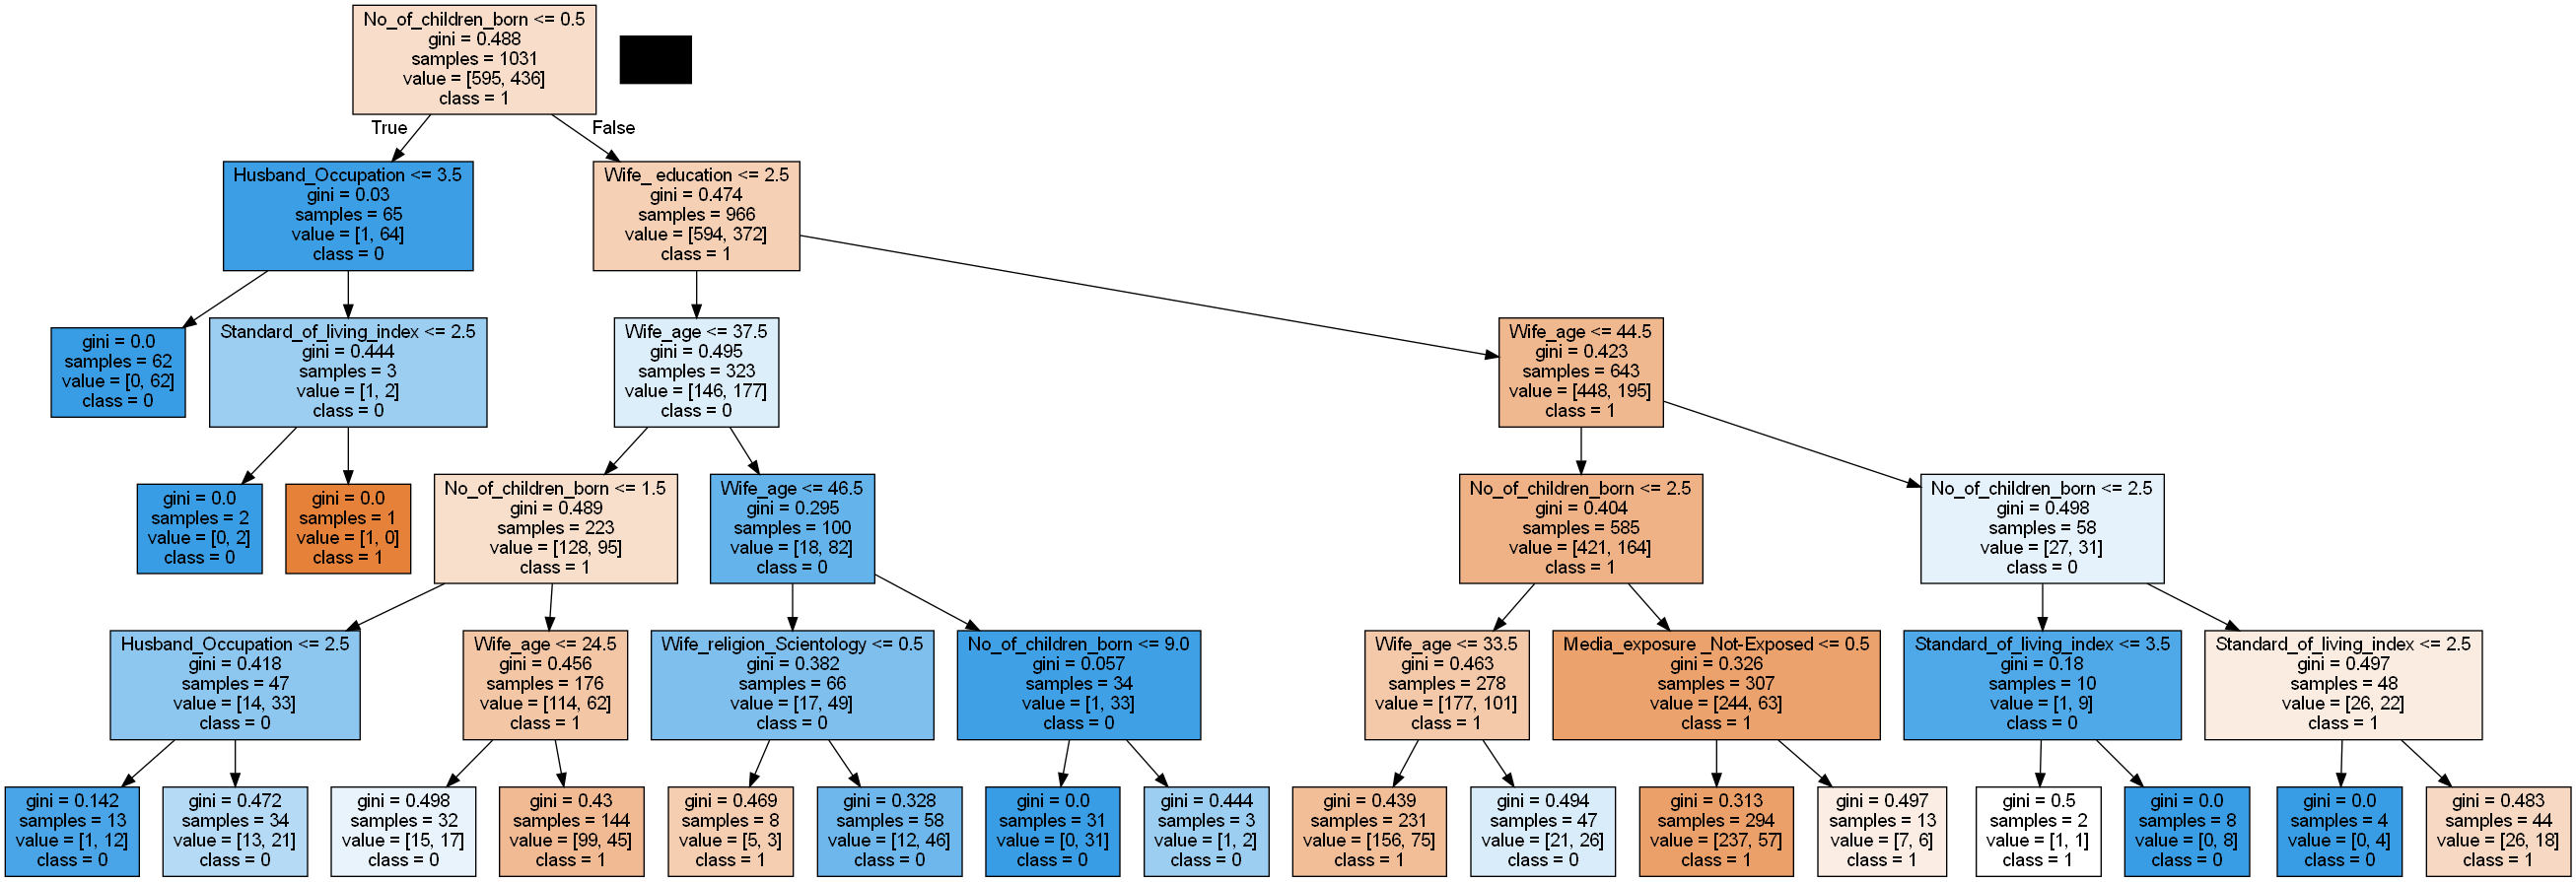

In [96]:
Image(graph[0].create_png())

In [97]:
#dtree.feature_importances_
imp_df_reg_dtree =pd.DataFrame(reg_dtree.feature_importances_, columns=['Imp'], index=X_train.columns)
imp_df_reg_dtree['Imp'].sort_values()

Husband_education              0.000000
Wife_Working_Yes               0.000000
Media_exposure _Not-Exposed    0.012904
Husband_Occupation             0.017292
Wife_religion_Scientology      0.017780
Standard_of_living_index       0.033955
Wife_ education                0.186286
Wife_age                       0.268891
No_of_children_born            0.462892
Name: Imp, dtype: float64

The features with 0 importance can be dropped for CART Classification.

In [115]:
# Define the models
models = [('Logistic Regression', LogisticRegression(max_iter=1000)),
          ('LDA', LinearDiscriminantAnalysis(n_components=1)),
          ('CART', DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0))]

## 2.3 Performance Metrics:
Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

In [116]:
# define empty lists to contain the performance metrics:

model_names = []
accuracy_train = []
accuracy_test = []
confusion_train = []
confusion_test = []
report_train = []
report_test = []
roc_auc_train = []
roc_auc_test =[]

Empty lists are created to store the performance metrics like accuracy, ROC_AUC Score, Confusion Matrix, Classification Report

### Confusion Matrix

In [117]:
def conf_mat(y_test, y_predict):
    # Compute confusion matrix
    cm = metrics.confusion_matrix(y_test, y_predict)
    plt.figure(figsize=(6, 4))
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    classNames = ['Contraception Yes', 'Contraception No']
    plt.title('Confusion Matrix - Test Data for {} Model'.format(model))
    plt.ylabel('Actual (True) label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    plt.xticks(rotation=45)
    s = [['TN', 'FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j, i, str(s[i][j]) + " = " + str(cm[i][j]))
    plt.show()

In [118]:
y_true = np.array(['-1', '1', '1', '-1'])
y_true[y_true == '-1'] = 0  # convert to {0, 1}
y_true[y_true == '1'] = 1
y_true = y_true.astype(int)

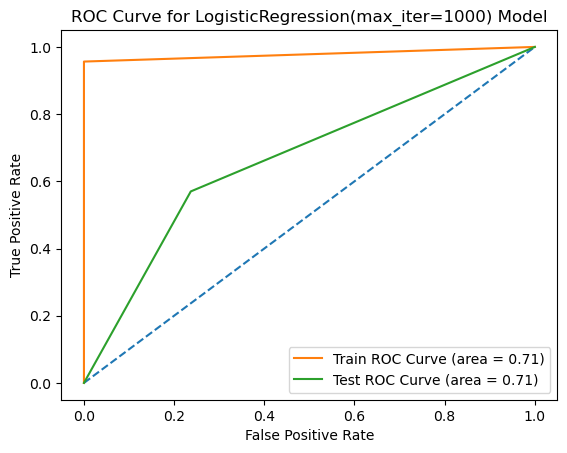

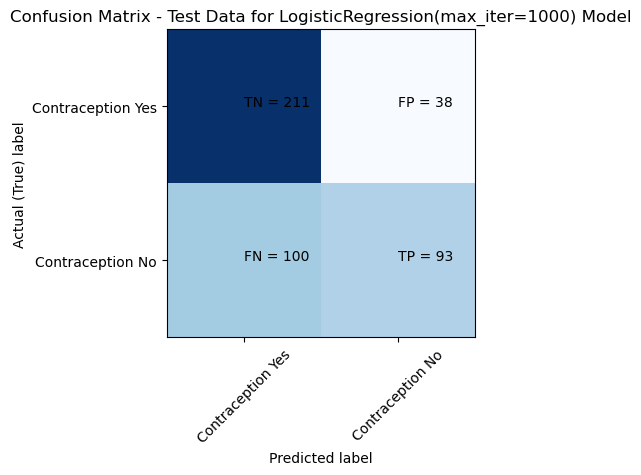

Model:  Logistic Regression
Confusion Matrix for Train Data:
[[486 109]
 [235 201]]
Classification Report for Train Data:
              precision    recall  f1-score   support

           0       0.67      0.82      0.74       595
           1       0.65      0.46      0.54       436

    accuracy                           0.67      1031
   macro avg       0.66      0.64      0.64      1031
weighted avg       0.66      0.67      0.65      1031

-----------------------
Model:  Logistic Regression
Confusion Matrix for Test Data:
[[211  38]
 [100  93]]
Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.68      0.85      0.75       249
           1       0.71      0.48      0.57       193

    accuracy                           0.69       442
   macro avg       0.69      0.66      0.66       442
weighted avg       0.69      0.69      0.68       442

-----------------------


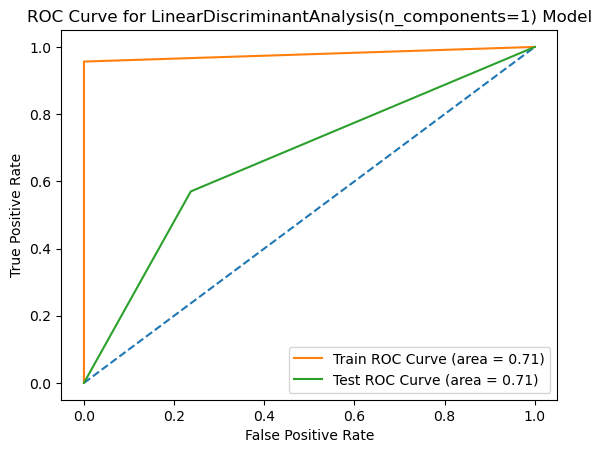

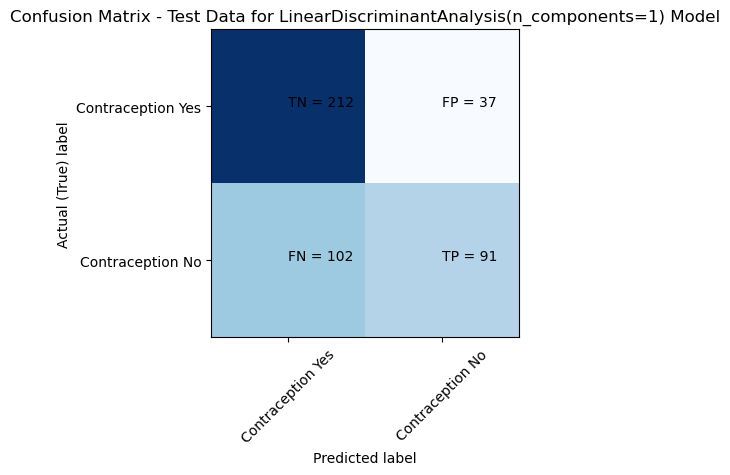

Model:  LDA
Confusion Matrix for Train Data:
[[489 106]
 [236 200]]
Classification Report for Train Data:
              precision    recall  f1-score   support

           0       0.67      0.82      0.74       595
           1       0.65      0.46      0.54       436

    accuracy                           0.67      1031
   macro avg       0.66      0.64      0.64      1031
weighted avg       0.67      0.67      0.66      1031

-----------------------
Model:  LDA
Confusion Matrix for Test Data:
[[212  37]
 [102  91]]
Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.68      0.85      0.75       249
           1       0.71      0.47      0.57       193

    accuracy                           0.69       442
   macro avg       0.69      0.66      0.66       442
weighted avg       0.69      0.69      0.67       442

-----------------------


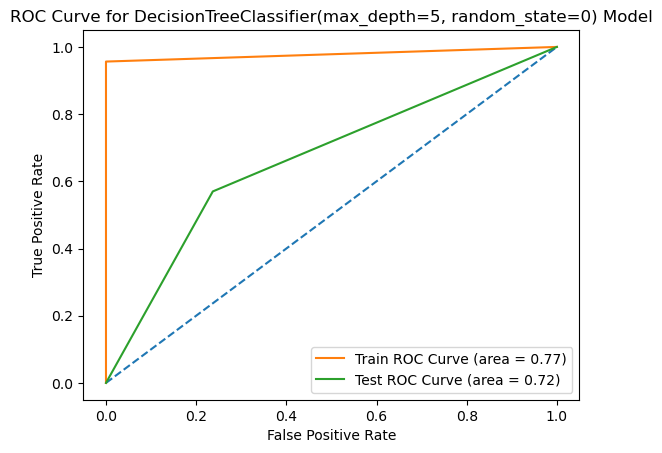

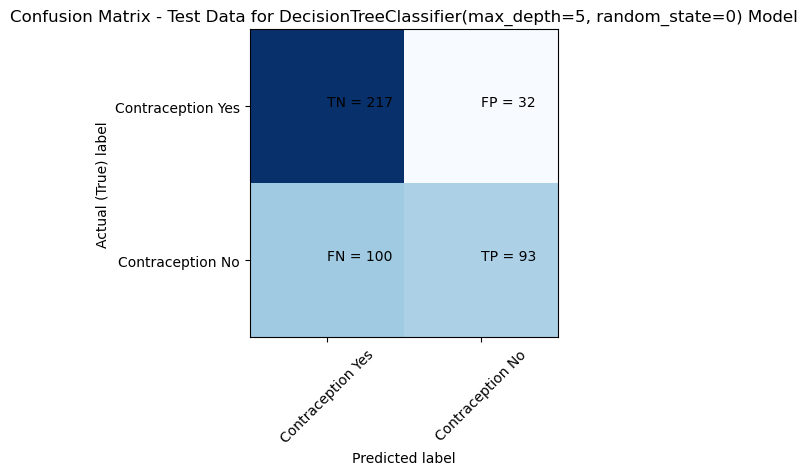

Model:  CART
Confusion Matrix for Train Data:
[[532  63]
 [205 231]]
Classification Report for Train Data:
              precision    recall  f1-score   support

           0       0.72      0.89      0.80       595
           1       0.79      0.53      0.63       436

    accuracy                           0.74      1031
   macro avg       0.75      0.71      0.72      1031
weighted avg       0.75      0.74      0.73      1031

-----------------------
Model:  CART
Confusion Matrix for Test Data:
[[217  32]
 [100  93]]
Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.68      0.87      0.77       249
           1       0.74      0.48      0.58       193

    accuracy                           0.70       442
   macro avg       0.71      0.68      0.68       442
weighted avg       0.71      0.70      0.69       442

-----------------------


In [129]:
# loop through the models
for name, model in models:

    # fit the model on the training data
    model.fit(X_train, y_train)

    # predict the training and test data
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # calculate the performance metrics

    accuracy_train_score = accuracy_score(y_train, y_pred_train)
    accuracy_test_score = accuracy_score(y_test, y_pred_test)
    confusion_train_score = confusion_matrix(y_train, y_pred_train)
    confusion_test_score = confusion_matrix(y_test, y_pred_test)
    report_train_score = classification_report(y_train, y_pred_train)
    report_test_score = classification_report(y_test, y_pred_test)

    # Get the predicted probabilities for train and test data
    y_train_proba = model.predict_proba(X_train)[:, 1]
    y_test_proba = model.predict_proba(X_test)[:, 1]

    # Calculate the roc_auc_score for train and test data
    train_roc_auc_score = roc_auc_score(y_train, y_train_proba)
    test_roc_auc_score = roc_auc_score(y_test, y_test_proba)

   # train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_proba)
    #test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_proba)
    
    plt.plot([0, 1], [0, 1], linestyle='--')
    # plot ROC curves
    plt.plot(train_fpr, train_tpr, label='Train ROC Curve (area = %0.2f)' % train_roc_auc_score)
    plt.plot(test_fpr, test_tpr, label='Test ROC Curve (area = %0.2f)' % test_roc_auc_score)


    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve for {} Model".format(model))
    plt.legend(loc="lower right")
    plt.show()
    
    # Plot Confusion Matrix
    conf_mat(y_test, y_pred_test)
    
    # Print the confusion matrix and classification report for train data
    print('Model: ', name)
    print('Confusion Matrix for Train Data:')
    print(confusion_matrix(y_train, y_pred_train))
    print('Classification Report for Train Data:')
    print(classification_report(y_train, y_pred_train))
    print('-----------------------')
    
    # Print the confusion matrix and classification report for test data
    print('Model: ', name)
    print('Confusion Matrix for Test Data:')
    print(confusion_matrix(y_test, y_pred_test))
    print('Classification Report for Test Data:')
    print(classification_report(y_test, y_pred_test))
    print('-----------------------')

    # append the results to the respective lists
    model_names.append(name)
    accuracy_train.append(accuracy_train_score)
    accuracy_test.append(accuracy_test_score)
    confusion_train.append(confusion_train_score)
    confusion_test.append(confusion_test_score)
    report_train.append(report_train_score)
    report_test.append(report_test_score)
    roc_auc_train.append(train_roc_auc_score)
    roc_auc_test.append(test_roc_auc_score)

In [120]:
# create a dataframe to store the results
results_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy (train)': accuracy_train,
    'Accuracy (test)': accuracy_test,
    'ROC AUC (train)': roc_auc_train,
    'ROC AUC (test)': roc_auc_test
})

### Best Model

In [130]:
results_df

Model  Accuracy (train)  Accuracy (test)  ROC AUC (train)  \
0  Logistic Regression          0.666343         0.687783         0.706077   
1                  LDA          0.668283         0.685520         0.706131   
2                 CART          0.740058         0.701357         0.770935   

   ROC AUC (test)  
0        0.711697  
1        0.710136  
2        0.723599

Regularized CART is slightly a better model

## 2.4 Inference:
Basis on these predictions, what are the insights and recommendations.
Please explain and summarise the various steps performed in this project. There should be proper business interpretation and actionable insights present.

## Reflection Report

Please reflect on all that you learnt and fill this reflection report. You have to copy the link and paste it on the URL bar of your respective browser.
https://docs.google.com/forms/d/e/1FAIpQLScKuVyrmTTM7Pboh0IB4YIBUbJp2NrDZcsY4SCRn3ZUkwmLGg/viewform